In [1]:
import platform

print(f"Python version: {platform.python_version()}")
assert platform.python_version_tuple() >= ("3", "6")

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Setup plots
%matplotlib inline
plt.rcParams["figure.figsize"] = 10, 8
%config InlineBackend.figure_format = 'retina'
sns.set()

Python version: 3.8.5


# Kmeans

In [2]:
from pyfit.kmeans import KMeans

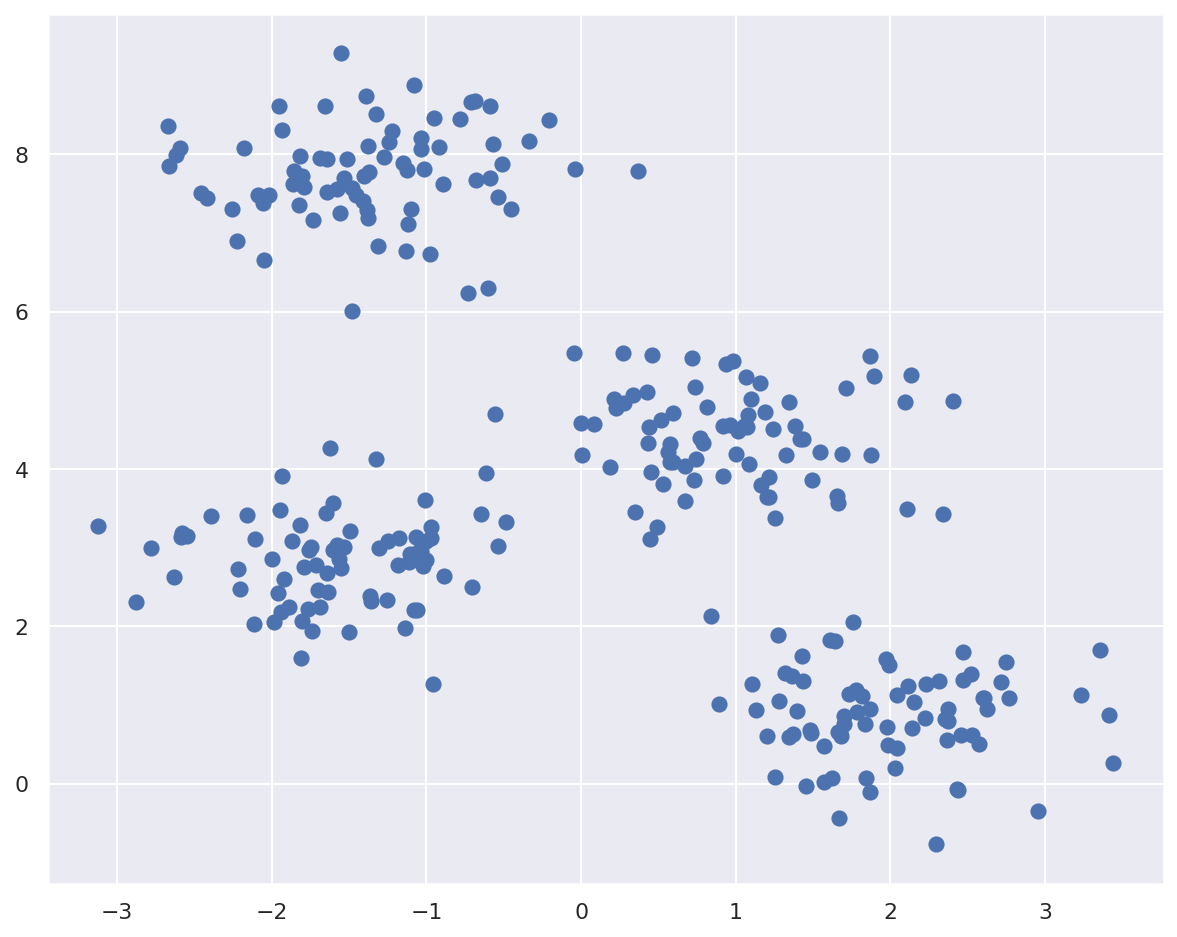

In [3]:
# dataset generation
from sklearn.datasets import make_blobs

X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50)

nb iterations : 100


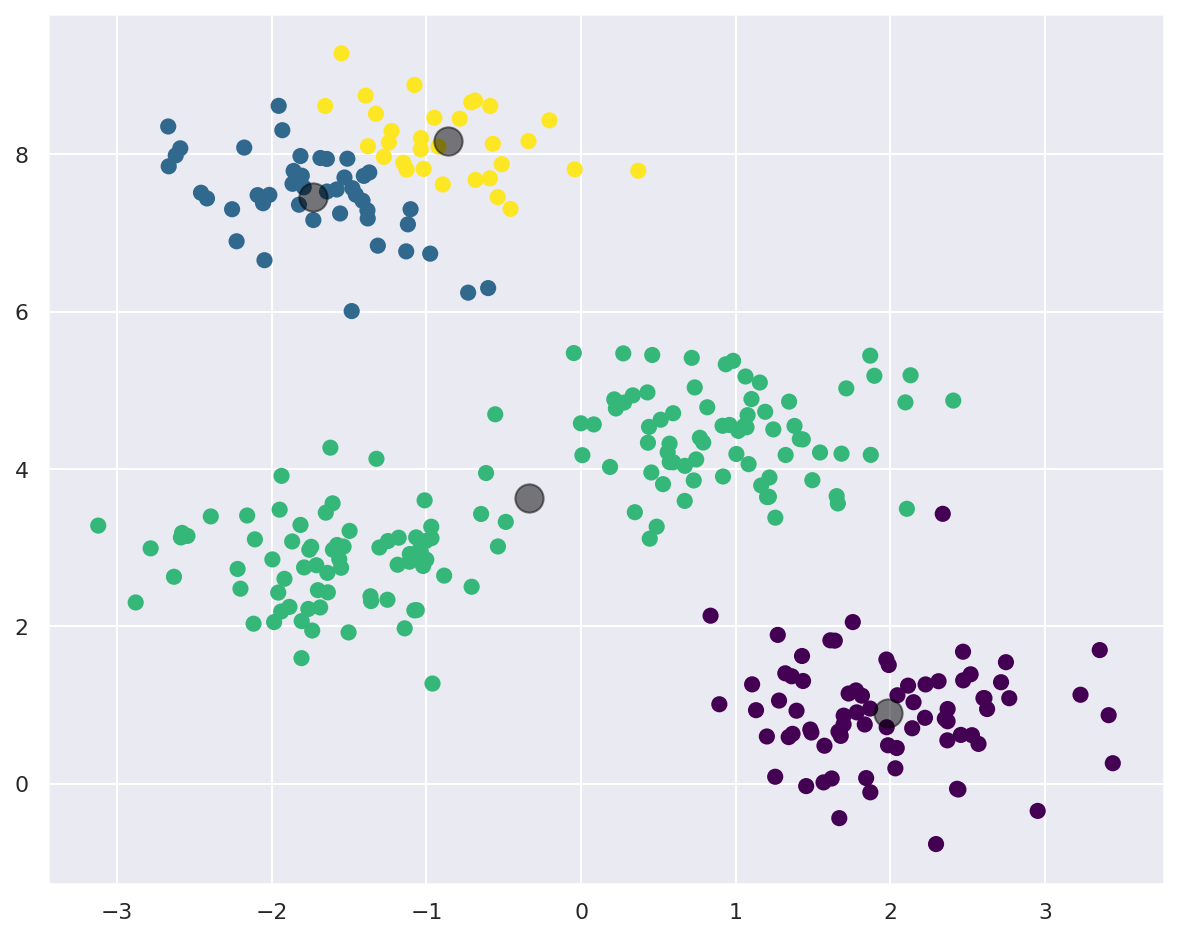

In [4]:
# Apply kmeans
kmeans = KMeans(n_clusters = 4).fit(X)
centers, labels = kmeans.centers_, kmeans.labels_

#plot the labels
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')

#plot the centers
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

# Decision Tree Classifier

In [1]:
from pyfit.decisionTreeClassifier import DecisionTreeClassifier
from pyfit.metrics import accuracy_score
from sklearn.datasets import load_iris, load_breast_cancer
import pandas as pd

In [2]:
# Load the Iris dataset
iris = load_iris()

# Put it into a DataFrame for visualization purposes
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
# Add target and class columns to DataFrame
df_iris["target"] = iris.target
df_iris["class"] = iris.target_names[iris.target]
# Show 10 random samples
df_iris.sample(n=5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,class
77,6.7,3.0,5.0,1.7,1,versicolor
135,7.7,3.0,6.1,2.3,2,virginica
105,7.6,3.0,6.6,2.1,2,virginica
30,4.8,3.1,1.6,0.2,0,setosa
37,4.9,3.6,1.4,0.1,0,setosa


In [3]:
x_train = iris.data
y_train = iris.target

print(f"x_train: {x_train.shape}")
print(f"y_train: {y_train.shape}")

x_train: (150, 4)
y_train: (150,)


In [4]:
# Train a DT on thedataset
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=10)
dt_model.fit(x_train, y_train)

/home/shurean/Documents/cours/semestre_9/projet_semestriel/pyfit-ultime/pyfit/decisionTreeClassifier.py:73: RuntimeWarning: invalid value encountered in true_divide
  above_gini /= (above_total ** 2)


[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

Exception: node without data, x is empty

In [ ]:
# Compute accuracy on training set
y_pred = [dt_model.predict(x) for x in x_train]
print(y_train)
print(y_pred)
acc = accuracy_score(y_train, y_pred)
print(f"Training accuracy: {acc:.5f}")